In [1]:
def next_file(time):
    
    # 將字串轉成整數時間
    hour, minute = map(int, time.split('_'))

    minute += 10
    if minute >= 60:
        minute = 0
        hour += 1
    if hour >= 24:
        hour = 0
    new_time = f"{hour:02d}_{minute:02d}"
    return new_time


In [2]:
import pandas as pd
import os
import json
from collections import defaultdict
import datetime
from datetime import date
import csv
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import gc
import time
# 設定中文字型（這裡以 Noto Sans CJK 為例）
plt.rcParams['font.family'] = 'Microsoft JhengHei' 

In [3]:
current_path = os.getcwd()
folder_path = os.path.dirname(current_path)

In [4]:
plant_name = '碧海'

一小時

In [5]:
d = date(2024,1,1)
days = [31,29,31,30,31,30,31,31,30,31,30,31]

power = []
with open(f"{plant_name}year_1h.csv", mode="w", newline='', encoding="utf-8") as output:
    writer = csv.writer(output)
    writer.writerow(['date','time','MW'])
for da in days:
    print(da)
    for day in range(da):
        file = '00_00'
        for i in range(24):
            hour_power=0
            rd, rf = d, file
            miss = 6
            for j in range(6):
                path = Path(f"{folder_path}/history/{d}/{file}.log")
                if path.exists():
                    with open(path, "r", encoding="utf-8") as f:
                        try:
                            log_data = json.load(f)
                            plants = defaultdict(list)
                            for unit in log_data["info"]:
                                if plant_name in unit["name"]:
                                    hour_power += float(unit['used'])
                            file = next_file(file)
                            # 處理 data
                        except json.JSONDecodeError:
                            #print(f"⚠️ JSON 解析錯誤，跳過：{d,rf}")
                            file = next_file(file)
                            continue
                        del log_data
                # missing value 
                else:
                    miss -= 1
                    file = next_file(file)
            if miss == 0:
                #print('miss',d,rf)
                power.append([rd, rf, -1])
            else:
                power.append([rd, rf, round(hour_power,3)])
            if len(power) >= 500:
                with open(f"{plant_name}year_1h.csv", mode="a", newline='', encoding="utf-8") as output:
                    writer = csv.writer(output)
                    for write in power:  
                        writer.writerow(write)
                power.clear()
                gc.collect()
        d = d + datetime.timedelta(days=1)
with open(f"{plant_name}year_1h.csv", mode="a", newline='', encoding="utf-8") as output:
    writer = csv.writer(output)
    for write in power:  
        writer.writerow(write)
    

31
29
31
30
31
30
31
31
30
31
30
31


天氣

In [6]:
import pandas as pd
read = [ '時間', '降水量(mm)', '測站氣壓(hPa)', '相對濕度(%)', '氣溫(℃)', '平均風風速(m/s)', '平均風風向(360 degree)']
# 讀取 CSV 檔案
df = pd.read_csv(f"2024.csv",usecols=read)

# 顯示前幾筆資料
print(df.head())

                    時間  降水量(mm)  測站氣壓(hPa)  相對濕度(%)  氣溫(℃)  平均風風速(m/s)  \
0  2024-01-01 00:00:00      0.0      955.0     97.0   13.2         0.2   
1  2024-01-01 01:00:00      0.0      954.8     98.0   12.8         0.6   
2  2024-01-01 02:00:00      0.0      954.2     98.0   12.5         0.0   
3  2024-01-01 03:00:00      0.0      953.8     98.0   12.3         0.1   
4  2024-01-01 04:00:00      0.0      953.6     98.0   12.1         0.1   

   平均風風向(360 degree)  
0                0.0  
1              105.0  
2                0.0  
3                0.0  
4                0.0  


8784 8784
                    降水量(mm)  測站氣壓(hPa)   相對濕度(%)     氣溫(℃)  平均風風速(m/s)  \
降水量(mm)            1.000000  -0.312557  0.119341  0.033811    0.243813   
測站氣壓(hPa)         -0.312557   1.000000  0.045735 -0.702735   -0.200594   
相對濕度(%)            0.119341   0.045735  1.000000 -0.338409   -0.158675   
氣溫(℃)              0.033811  -0.702735 -0.338409  1.000000   -0.003507   
平均風風速(m/s)         0.243813  -0.200594 -0.158675 -0.003507    1.000000   
平均風風向(360 degree)  0.011762  -0.054641 -0.123770 -0.076332    0.601977   
MW                -0.039090  -0.292218  0.098146  0.307379   -0.045358   

                   平均風風向(360 degree)        MW  
降水量(mm)                     0.011762 -0.039090  
測站氣壓(hPa)                  -0.054641 -0.292218  
相對濕度(%)                    -0.123770  0.098146  
氣溫(℃)                      -0.076332  0.307379  
平均風風速(m/s)                  0.601977 -0.045358  
平均風風向(360 degree)           1.000000 -0.015501  
MW                         -0.015501  1.000000  


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.draw()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


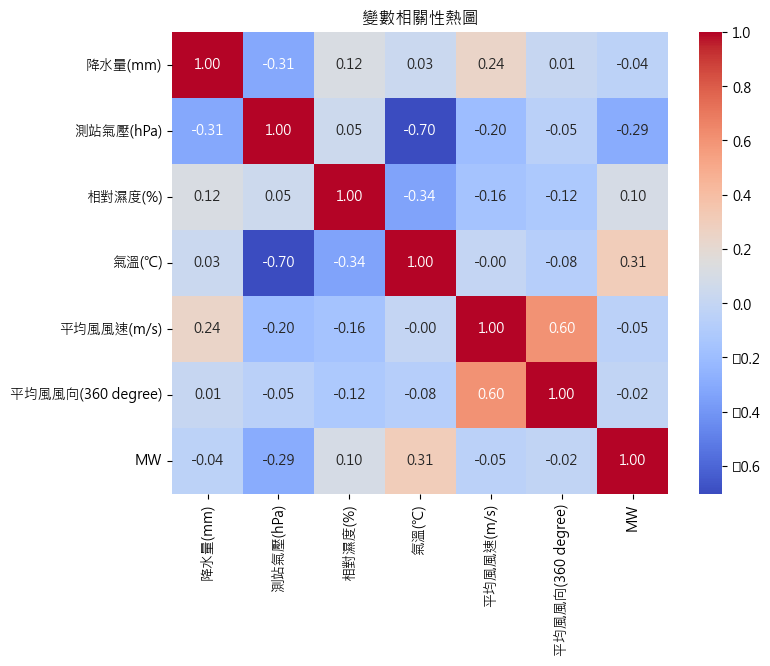

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

read = [ '時間', '降水量(mm)', '測站氣壓(hPa)', '相對濕度(%)', '氣溫(℃)', '平均風風速(m/s)', '平均風風向(360 degree)']

df1 = pd.read_csv(f"2024.csv",usecols=read)
df2 = pd.read_csv(f"{plant_name}year_1h.csv",usecols = ['MW'])

# 檢查是否有相同行數
print(len(df1),len(df2))
assert len(df1) == len(df2), "兩個檔案列數不同！"

df_combined = pd.concat([df1, df2], axis=1)

# 只保留數值型欄位
df_numeric = df_combined.select_dtypes(include=['int64', 'float64'])

# 計算相關係數
correlation_matrix = df_numeric.corr()

# 顯示結果
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("變數相關性熱圖")
plt.show()

發電折線圖

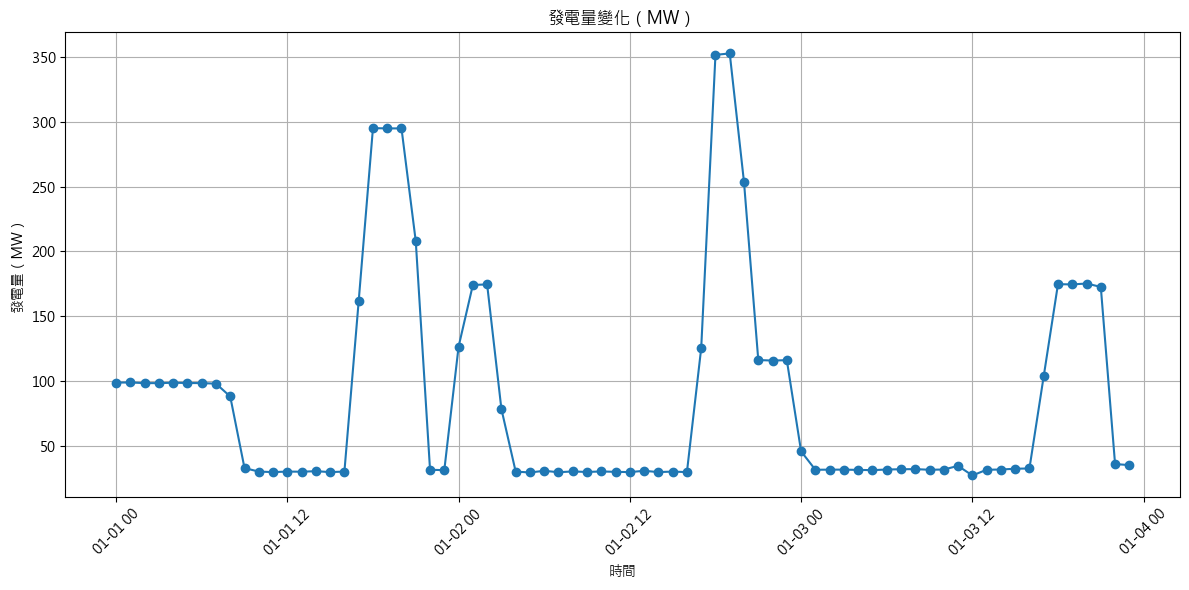

In [8]:
# 讀取 CSV
df = pd.read_csv(f"{plant_name}year_1h.csv")

# 將日期欄轉成 datetime（推薦）
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'].str.replace('_', ':'))
df =df.head(72)


plt.figure(figsize=(12,6))
plt.plot(df['datetime'], df['MW'], marker='o', linestyle='-')
plt.title("發電量變化（MW）")
plt.xlabel("時間")
plt.ylabel("發電量（MW）")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
